<a href="https://colab.research.google.com/github/chungsoonyeow-hub/ADALL_github/blob/main/project/0_LLM_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup: import libraries


In [13]:
# Core libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
# Modelling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**2. Load the dataset**

In [ ]:
# # Example: Replace this with the raw URL of your GitHub file
# github_raw_url = 'https://raw.githubusercontent.com/rq-goh/ADALL_github/main/laptop_prices_2024_sgd_TL.csv'
# try:
#     df = pd.read_csv(github_raw_url)
#     print("Successfully loaded data from GitHub!")
#     display(df.head())
# except Exception as e:
#     print(f"Error loading data: {e}")
#     print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## as my dataset is too huge, i can only upload to google drive instead of github
try:
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/incident_event_log.csv")
    print("Successfully loaded data from Colab!")
    #display(df.head())
    # Preview dataset
    data_preview = df.head(10).to_string()
    print(data_preview)
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

Successfully loaded data from Colab!
       number incident_state  active  reassignment_count  reopen_count  sys_mod_count  made_sla    caller_id       opened_by        opened_at  sys_created_by   sys_created_at  sys_updated_by   sys_updated_at contact_type      location     category      subcategory    u_symptom cmdb_ci      impact     urgency      priority assignment_group  assigned_to  knowledge  u_priority_confirmation         notify problem_id rfc vendor caused_by closed_code      resolved_by      resolved_at       closed_at
0  INC0000045            New    True                   0             0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16    Created by 6  29/2/2016 01:23   Updated by 21  29/2/2016 01:23        Phone  Location 143  Category 55  Subcategory 170   Symptom 72       ?  2 - Medium  2 - Medium  3 - Moderate         Group 56            ?       True                    False  Do Not Notify          ?   ?      ?         ?      code 5  Resolved by 14

In [15]:
### connect to API
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [ ]:
#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
    You are an expert data scientist with extensive knowledge of models working on a new project
""",
    input=f"""
    [CONTEXT]
    This project is related to IT incident management. The company is facing issues with SLA breaches and the IT Service Manager is trying to reduce the incident SLA breach rate.

    [TASK]
    Generate a business problem paragraph that describes:
    1. What the problem is
    2. Why it matters to the organisation
    3. Who is affected and what pain poin ts they face

    [FORMAT]

    Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.Limit to max 100 words.

    [CONSTRAINTS]
    Do not include technical terms like modelling, prediction, or machine learning. Avoid overly generic phrases like “AI can help.” Focus on the business situation and impact.
    """)
print(response.output_text)

The organization is experiencing frequent IT incident SLA breaches, with incidents remaining unresolved beyond agreed response and resolution times, causing recurring service interruptions.

This matters because breaches erode customer trust, increase operational costs, risk contractual penalties, and slow business operations, hindering revenue and strategic initiatives.

Service desk and IT teams face constant firefighting and overload, business users suffer lost productivity and missed deadlines, and executives contend with reputational damage and escalations that strain resources.


In [ ]:
#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
   You are a expert data scientist with extensive knowledge of tree base models working on a new project
""",
    input=f"""


    [CONTEXT]
    This project is about improving how IT incidents are managed. The company is concerned about SLA breaches and hopes to reduce them. There are various users affected by this issue. It is important that we understand their needs.

    [TASK]
    Generate a business problem paragraph that describes:
    1. What the problem is
    2. Why it matters to the organisation
    3. Who is affected and what pain points they face

    Stakeholder Persona:
    1. Who is the main user?
    2. What do they need? their pain points and goals
    3. How they would use the solution?

    Modelling Objective:
    1. What are we predicting?
    2. What metrics matter?

    [FORMAT]
    Use a formal and professional tone.
    Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.

    [CONSTRAINTS]
    Keep response concise and actionable.
    """)
print(response.output_text)

The organisation is experiencing a high and growing rate of IT incident SLA breaches, driven by slow triage, inconsistent prioritisation and reactive escalation processes. This undermines service availability, increases operational costs and creates regulatory and contractual exposure through penalties and lost revenue, while eroding customer and employee trust.

This matters because SLA breaches directly impact business continuity and productivity, inflate support costs through repeated work and escalations, and degrade customer satisfaction and retention. Reducing breaches improves operational efficiency, lowers costs, and preserves contractual and reputational value.

Affected parties include IT operations and service desk teams (who face firefighting, unclear priorities and inefficient resource allocation), business users and customers (who suffer downtime and disrupted workflows), and executives (who must manage financial and reputational risk). Pain points are incomplete incident

In [ ]:



#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
   You are a expert data scientist with extensive knowledge of tree base models working on a new project
""",
    input=f"""
     [CONTEXT]
    This project is about improving how IT incidents are managed. The company is concerned about SLA breaches and hopes to reduce them.
    [TASK]
    Write a short paragraph that explains:
    - What is the business problem
    - Why it matters
    - Who is affected

    Also describe the main stakeholder persona and what they care about.
    Add a short section about what to predict and how to measure success.

    [FORMAT]
    Use clear language in paragraph form.
    Respond in paragraph form, using clear line breaks. Insert a blank line between key ideas to improve readability.

     [CONSTRAINTS]
    Keep response concise and actionable.

 """)
print(response.output_text)

In [ ]:
#sending to LLM API for business problem description
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
   You are a expert data scientist with extensive knowledge of tree base models working on a new project
""",
    input=f"""
    [CONTEXT]
    This project focuses on improving how IT incidents are managed in the organisation. The company is concerned about SLA breaches, which are affecting service quality and compliance. Johnny Lim, the IT Service Manager, wants to reduce SLA breaches — his key performance indicator (KPI).

    One recurring issue is that incident tickets are sometimes assigned to the wrong teams. These teams hold onto the tickets without action, leading to delays and potential SLA breaches. Johnny hopes to build a model that can help flag incidents likely to breach SLA right after creation, based on past data such as urgency, severity, assignment group, and time open. If high-risk tickets are detected early, the ITSM team can manually review and redirect them to the correct team faster.

    [TASK]
    Generate a business problem paragraph that describes:
    -What the problem is
    -Why it matters to the organisation
    -Who is affected and what pain points they face

    Stakeholder Persona
    -Who is the main user?
    -What do they need — their pain points and goals?
    -How would they use the solution?

    Modelling Objective
    -What are we predicting?
    -What metrics matter?
    -What features are likely important for prediction?

    [FORMAT]
    Use a formal and professional tone.
    Respond in paragraph form with line breaks between sections for readability.

    [CONSTRAINTS]
    Keep the response concise and actionable.
 """)
print(response.output_text)

Business problem: Incident tickets are frequently routed to incorrect assignment groups and then left unattended, causing increased time-to-resolution and a rise in SLA breaches. This undermines service quality, exposes the organisation to compliance risk and potential financial penalties, and damages stakeholder confidence. The operational consequences include growing backlogs, repeated manual reassignments, overtime costs, and missed KPIs that affect both IT performance reporting and business continuity.

Stakeholder persona: The primary user is Johnny Lim, the IT Service Manager, who needs rapid, reliable identification of tickets at high risk of breaching SLA so he can intervene early. His pain points are limited visibility into misrouted tickets at creation, reactive firefighting, and pressure to meet SLA targets with constrained resources. He would use the solution as a near-real-time triage aid — receiving risk flags and ranked queues for manual review or suggested reassignment,

**3. Quick Profile on the 140k transaction log**

In [6]:
print("=== INCIDENT LOG QUICK PROFILE ===")
print(f"Shape: {df.shape}")
print("\nALL COLUMNS:")
print(df.columns.tolist())
print("\nTarget `made_sla`:")
print(df['made_sla'].value_counts())
print("\nUnique Incidents:")
print(df['number'].nunique())
print("\nRows per Incident (avg):")
print(df.groupby('number').size().mean())
print("\nHead:")
print(df.head())

=== INCIDENT LOG QUICK PROFILE ===
Shape: (141712, 36)

ALL COLUMNS:
['number', 'incident_state', 'active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']

Target `made_sla`:
made_sla
True     132497
False      9215
Name: count, dtype: int64

Unique Incidents:
24918

Rows per Incident (avg):
5.687133798860262

Head:
       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved  

In [ ]:
# Brief Findings
#Dataset is transactional (141k events → 24k incidents, avg 5.7 rows/incident)—use last record for final SLA state.
#Severe imbalance (93.5% made_sla=True) demands F1-macro + balanced weights (industry standard for rare breaches).

**4. Aggregate into unqiue incident records taking the latest transaction record for SLA status**

In [7]:
# RECREATE from raw (140k → 24k agg)


#Aggregation (latest per incident)
df_agg = df.sort_values(['number', 'sys_updated_at']).groupby('number').last().reset_index()
print(f"AGGREGATED: {df_agg.shape}")  # Expect ~24k x 36

# Drive save
from google.colab import drive
drive.mount('/content/drive')
target = '/content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv'
df_agg.to_csv(target, index=False)
print(f"SAVED: {target}")

# Quick check
print("Breach rate:", (df_agg['made_sla'] == False).mean())
print("Leak check:", 'resolved_at' in df_agg.columns)  # Keep for now → drop later


AGGREGATED: (24918, 36)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SAVED: /content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv
Breach rate: 0.16301468817722128
Leak check: True


In [8]:
## create payload text for open ai prompt

import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

buffer.write("=== TARGET FOCUS ===\n")
buffer.write(df['made_sla'].value_counts(normalize=True).round(3).to_string())
buffer.write("Imbalance → F1_macro + class_weight='balanced'\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# unique cardinality
buffer.write("=== UNIQUE VALUES PER COLUMN ===\n")
buffer.write(df.nunique().to_frame("unique_count").to_string())
buffer.write("\n\n")

# correlation matrix
buffer.write("=== CORRELATIONS (NUMERIC ONLY) ===\n")
buffer.write(df.corr(numeric_only=True).round(3).to_string())
buffer.write("\n\n")

# value counts for categoricals
buffer.write("=== VALUE COUNTS (TOP 20 PER CATEGORICAL COLUMN) ===\n")
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    for col in cat_cols:
        buffer.write(f"\nColumn: {col}\n")
        vc = df[col].value_counts().head(20)
        buffer.write(vc.to_string())
        buffer.write("\n")
else:
    buffer.write("No categorical columns\n")
buffer.write("\n")

# --------- FIXED OUTLIER COMPUTATION (NO BOOLEANS) ---------
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# leakage scan: columns with all unique values
buffer.write("=== POSSIBLE LEAKAGE COLUMNS (UNIQUE FOR EACH ROW) ===\n")
leak_cols = df.columns[df.nunique() == len(df)]
buffer.write(str(list(leak_cols)))
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

#####csy

buffer.write("===* NEAR-CONSTANT COLUMNS (>=95% SAME VALUE) ===\n")
near_constant_cols = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq >= 0.95:
        near_constant_cols.append(col)

buffer.write(str(near_constant_cols) if near_constant_cols else "None")
buffer.write("\n\n")

buffer.write("===* BINARY / BOOLEAN-LIKE COLUMNS ===\n")
binary_cols = [c for c in df.columns if df[c].nunique() == 2]
for col in binary_cols:
    buffer.write(f"\nColumn: {col}\n")
    buffer.write(df[col].value_counts(normalize=True).to_string())
    buffer.write("\n")
buffer.write("\n")

buffer.write("=== *NUMERIC SKEWNESS SUMMARY ===\n")
skewness = df[num_cols].skew().round(2)
buffer.write(skewness.to_string())
buffer.write("\n\n")
#skewnss is not an issue for tree models

####csy
buffer.write("\n=== TASK ===\nPredict made_sla=False (breach) at ticket creation.\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)

=== DTYPES ===
number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object

In [9]:
##  open ai prompt   data profiling on data issues and cleaning

response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
    Context (given):\n
- Business Objective: Predict SLA breach for incident tickets based on structured metadata.
- Target: The field `made_sla` indicates whether the SLA was met.
    - If `made_sla` is False → SLA was breached.
    - If `made_sla` is True → SLA was met.
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)

Below I first list the recommended data-quality fixes in priority order with short, dataset-driven justification. Then I list columns that look redundant/correlated or likely to cause leakage and explain why (again using the profile indicators). Finally I provide the requested Python cleaning script: one helper function per issue, a wrapper that calls them based on boolean switches, and a single-line invocation example. I do not encode categoricals or run modelling.

------------------------------------------------------------
1) Priority list of data-quality issues to resolve (highest → lowest)
------------------------------------------------------------

1. Replace placeholder "?" with true missing (NaN).
- Why (from profile): many object columns contain "?" as the top value or a massive count of this placeholder (e.g., sys_created_by has "?" 53,076 occurrences; sys_created_at has "?" 53,076; cmdb_ci has "?" 141,267; problem_id "?" 139,417; rfc "?" 140,721; vendor "?" 141,468; caused

In [12]:
# STEP 1: Diagnose
print("=== DIAGNOSE 24k ===")
print("Leak (unique all rows):", [c for c in df.columns if df[c].nunique()==len(df)][0:5])
print("Constants (1-2 vals):", [c for c in df.columns if df[c].nunique()<=2])
print("High nulls:", df.isnull().sum().sort_values(ascending=False).head())

# STEP 2: Conservative clean (no cap/card reduce)
cleaned_df = clean_incidents(
    df,
    cap_outliers=False,
    reduce_cardinality_flag=False,
    drop_sys_created_dups=False
)
print("\n=== AFTER CLEAN ===")
print("Shape:", cleaned_df.shape)
print("Dropped cols:", sorted(set(df.columns) - set(cleaned_df.columns)))

# STEP 3: Save
cleaned_df.to_csv('incident_clean_safe.csv', index=False)
print("Saved incident_clean_safe.csv")

=== DIAGNOSE 24k ===
Leak (unique all rows): []
Constants (1-2 vals): ['active', 'made_sla', 'knowledge', 'u_priority_confirmation', 'notify']
High nulls: number                0
incident_state        0
active                0
reassignment_count    0
reopen_count          0
dtype: int64


NameError: name 'clean_incidents' is not defined

In [11]:
### from chatgpt (Not using)

response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are a senior data scientist reviewing an incident management dataset to prepare it for tree-based modelling.
Use professional judgment and always justify your recommendations based on the dataset profile and domain context.
Do not suggest dropping columns unless there's a strong risk (e.g., confirmed leakage, constant column, etc.).
Your goal is not to remove many columns but to make defensible modelling decisions that reflect how real-world data is used.
""",
    input=f"""
Context:
- This dataset contains aggregated incident records (~24k rows) to predict if SLA was breached (`made_sla` = False).
- Only the latest record per incident is kept from an original transaction log of ~140k rows.

Dataset Profile:
{payload_text}

Questions:

1. Based on the dataset profile and context, what data quality issues should be resolved before modelling?
   - List and prioritise each issue (e.g., missing values, outliers, timestamp format, etc.).
   - Use business and modelling context in your reasoning. Do not drop columns blindly.

2. Which columns are potentially redundant, high-risk (e.g., leakage), or problematic (e.g., overly unique, constant)?
   - Use the following diagnostics as *triggers* for review (not automatic removals):
     - Fully unique columns (possible IDs or post-target timestamps)
     - Constant columns (usually safe to drop)
     - High-cardinality categoricals (e.g., `location`)
     - Highly correlated numerical columns
   - For each, explain *why it matters*, and whether the risk is high or low.

3. Write a Python script that addresses the identified issues:
   - For each major issue (e.g., missing data, outliers, constant cols), define a helper function.
   - Then define a wrapper function that calls these, controlled by boolean flags for flexible use.
   - Do not encode categoricals or model yet — this step is only for realistic data prep.
   - Include a single line to call the wrapper function.

Stick closely to the context — do not hallucinate features not shown in the profile.
Use comments to explain each cleaning step clearly.
"""
)
print(response.output_text)

Below I (A) summarize and prioritise the data-quality and modelling issues you should address given the problem statement ("predict SLA breach at ticket creation"), (B) list columns that are potentially redundant, high-risk (leakage) or problematic and give a risk score + justification, and (C) provide a reusable Python cleaning script that implements the suggested fixes in a controlled, non‑destructive way. I explain the reasoning for each recommendation in terms of business context and modelling practice.

---

1) PRIORITISED DATA QUALITY & MODELLING ISSUES (with justification)

High priority (must fix before modelling to avoid leakage / wrong formulation)
- Leakage: many fields in the current snapshot reflect the ticket's lifecycle (resolved_at, closed_at, resolved_by, closed_code, sys_updated_at/sys_updated_by, sys_mod_count, reassignment_count, reopen_count, closed_code, etc.). These are not known at ticket-creation and therefore are strong leakage sources for a model intended to 

In [16]:


### CLEANING CODES - FINAL VERSION
import pandas as pd
import numpy as np
from google.colab import drive
#drive.mount('/content/drive')

print("=== LOAD 24K AGGREGATED ===")
df_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/incident_aggregate.csv')
print("Loaded shape:", df_clean.shape)

print("\n=== BEFORE CLEANING ===")
print("Shape:", df_clean.shape)
print("\nTarget balance:\n", df_clean['made_sla'].value_counts(normalize=True).round(3))

# 1. ? → NaN (all columns)
df_clean = df_clean.replace('?', np.nan)

# 2. Leakage (post-resolution)
leak_cols = ['resolved_at', 'closed_at', 'resolved_by', 'closed_code']
dropped_leak = [c for c in leak_cols if c in df_clean.columns]
df_clean = df_clean.drop(columns=dropped_leak)

# 3. ID column
if 'number' in df_clean.columns:
    df_clean = df_clean.drop(columns='number')

# 4. Constants/low-value (from profiling)
const_cols = ['notify', 'contact_type', 'reopen_count']
dropped_const = [c for c in const_cols if c in df_clean.columns]
df_clean = df_clean.drop(columns=dropped_const)

# 5. Datetime safe
df_clean['opened_at'] = pd.to_datetime(df_clean['opened_at'], errors='coerce')

print("\n=== NULL CHECK & HIGH-NULL DROP ===")
null_pct = df_clean.isnull().sum() / len(df_clean) * 100
high_null = null_pct[null_pct > 70].sort_values(ascending=False)
print("High null (>70%):\n", high_null)
if len(high_null) > 0:
    df_clean = df_clean.drop(columns=high_null.index)
    print("Dropped:", high_null.index.tolist())

print("\n=== AFTER CLEANING ===")
print("Final shape:", df_clean.shape)
print("\nRemaining nulls (top 5):\n", df_clean.isnull().sum().sort_values(ascending=False).head())
print("\nTarget balance (unchanged):\n", df_clean['made_sla'].value_counts(normalize=True).round(3))

# Screenshot df_clean.describe()
print("\n=== DESCRIBE FOR SLIDE 4 (Screenshot This) ===")
print(df_clean.describe())

# SAVE
df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/incident_clean_24k.csv', index=False)
print('Saved incident_clean_24k.csv')

=== LOAD 24K AGGREGATED ===
Loaded shape: (24918, 36)

=== BEFORE CLEANING ===
Shape: (24918, 36)

Target balance:
 made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64


/tmp/ipython-input-858646175.py:33: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['opened_at'] = pd.to_datetime(df_clean['opened_at'], errors='coerce')



=== NULL CHECK & HIGH-NULL DROP ===
High null (>70%):
 caused_by     99.987961
vendor        99.875592
cmdb_ci       99.783289
rfc           99.361907
problem_id    98.523156
dtype: float64
Dropped: ['caused_by', 'vendor', 'cmdb_ci', 'rfc', 'problem_id']

=== AFTER CLEANING ===
Final shape: (24918, 23)

Remaining nulls (top 5):
 sys_created_by      11495
sys_created_at      11495
u_symptom            5832
assignment_group     2205
assigned_to          1593
dtype: int64

Target balance (unchanged):
 made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

=== DESCRIBE FOR SLIDE 4 (Screenshot This) ===
       reassignment_count  sys_mod_count                      opened_at
count        24918.000000   24918.000000                          24918
mean             0.835781       5.070632  2016-04-15 16:17:42.879845888
min              0.000000       0.000000            2016-02-29 01:16:00
25%              0.000000       2.000000            2016-03-21 14:59:00
50%            

Loaded clean shape: (24918, 23)
Remaining nulls:
 sys_created_by      11495
sys_created_at      11495
u_symptom            5832
assignment_group     2205
assigned_to          1593
dtype: int64

=== TARGET EDA ===
made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

Breach Rate by Priority:
 made_sla      False  True 
priority                  
1 - Critical  0.665  0.335
2 - High      0.644  0.356
3 - Moderate  0.153  0.847
4 - Low       0.026  0.974


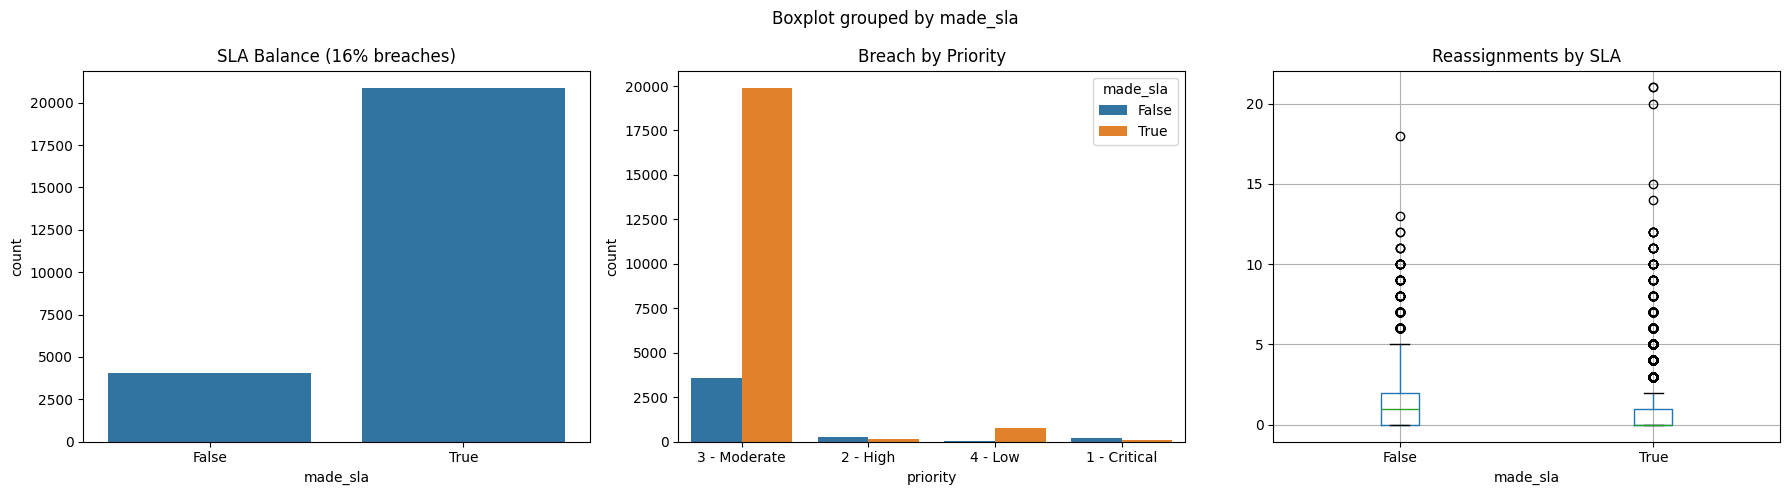


=== TOP FEATURES BY CORRELATION ===
made_sla_num          1.000
reassignment_count   -0.216
sys_mod_count        -0.344
Name: made_sla_num, dtype: float64


In [19]:

### EDA + SPLIT - FIXED CORRELATION VERSION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# LOAD CLEAN DATA
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/incident_clean_24k.csv")
print("Loaded clean shape:", df.shape)
print("Remaining nulls:\n", df.isnull().sum().sort_values(ascending=False).head())

# EDA 1: Target balance
print("\n=== TARGET EDA ===")
print(df["made_sla"].value_counts(normalize=True).round(3))

# EDA 2: Crosstab priority vs SLA
print("\nBreach Rate by Priority:\n",
      pd.crosstab(df["priority"], df["made_sla"], normalize="index").round(3))

# EDA 3: Plots for slides (SCREENSHOT THESE)
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(x="made_sla", data=df, ax=axes[0])
axes[0].set_title("SLA Balance (16% breaches)")

sns.countplot(x="priority", hue="made_sla", data=df, ax=axes[1])
axes[1].set_title("Breach by Priority")

df.boxplot(column="reassignment_count", by="made_sla", ax=axes[2])
axes[2].set_title("Reassignments by SLA")

plt.tight_layout()
plt.show()

# EDA 4: FIXED CORRELATION
print("\n=== TOP FEATURES BY CORRELATION ===")
df_corr = df.copy()
df_corr["made_sla_num"] = df_corr["made_sla"].astype(int)
numeric_cols = df_corr.select_dtypes(include="number").columns
corr = df_corr[numeric_cols].corr()["made_sla_num"].sort_values(ascending=False)
print(corr.round(3).head(10))





In [20]:
# SPLIT TRAIN/TEST (80/20 stratified)
X = df.drop("made_sla", axis=1)
y = df["made_sla"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n=== SPLIT COMPLETE ===")
print("Train:", X_train.shape, y_train.value_counts(normalize=True).round(3))
print("Test:", X_test.shape, y_test.value_counts(normalize=True).round(3))

# SAVE SPLIT FILES
X_train.to_csv("/content/drive/MyDrive/Colab Notebooks/X_train.csv", index=False)
X_test.to_csv("/content/drive/MyDrive/Colab Notebooks/X_test.csv", index=False)
y_train.to_csv("/content/drive/MyDrive/Colab Notebooks/y_train.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/Colab Notebooks/y_test.csv", index=False)

print("\n SAVED: X_train.csv, X_test.csv, y_train.csv, y_test.csv")
print("\n EDA + SPLIT COMPLETE - Next: Pipeline + RF/XGB!")


=== SPLIT COMPLETE ===
Train: (19934, 22) made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64
Test: (4984, 22) made_sla
True     0.837
False    0.163
Name: proportion, dtype: float64

 SAVED: X_train.csv, X_test.csv, y_train.csv, y_test.csv

 EDA + SPLIT COMPLETE - Next: Pipeline + RF/XGB!
